The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


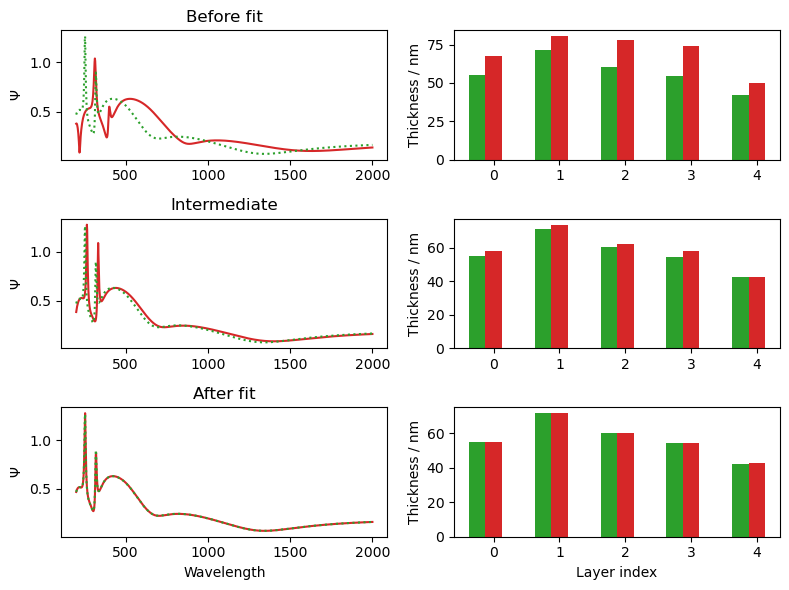

In [17]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append('./../../')
sys.path.append('./../../designer/script/')


from tmm.get_E import get_E_free
from tmm.get_jacobi_arb_adjoint import get_jacobi_E_free_form
from tmm.get_jacobi_adjoint import get_jacobi_adjoint
from tmm.get_spectrum import get_spectrum_free
from film import FreeFormFilm, TwoMaterialFilm
from tmm.autograd_wrapper import *
from tmm.E_to_spectrum import *

from optimizer.adam import AdamThicknessOptimizerAutograd

import matplotlib.pyplot as plt
import numpy as np
import copy
# set exp 
wls = np.linspace(200, 2000, 1000)

fig, axes = plt.subplots(3, 2)

layer_thickness = 100.
layer_number = 5
inc_ang = 60.
np.random.seed(0)
target_film = TwoMaterialFilm(2.5, 1.5, 2, np.random.random(layer_number) * layer_thickness)

target_film.add_spec_param(inc_ang, wls)
target_psi = target_film.get_spec().get_tanPsi()
target_edelta = np.exp(target_film.get_spec().get_delta() * 1j)


for i, ax, axd, avg_noise in zip(['Before fit', 'Intermediate', 'After fit'], axes[:, 0], axes[:, 1], [10, 2, 0.1]):
    film = TwoMaterialFilm(2.5, 1.5, 2, np.random.random(layer_number) * 2 * avg_noise + target_film.get_d())
    d = film.get_d()
    n_layers, n_sub, n_inc = film.calculate_n_array(wls), film.calculate_n_sub(wls), film.calculate_n_inc(wls)
    film.add_spec_param(inc_ang, wls)
    original_film = copy.deepcopy(film)

    tanpsi = film.get_spec().get_tanPsi()
    tanpsi_original = original_film.get_spec().get_tanPsi()

    delta = film.get_spec().get_delta()
    delta_original = original_film.get_spec().get_delta()


    ax.plot(wls, np.arctan(target_psi), label='Measured', c='C2', ls=':', zorder=1)
    ax.plot(wls, np.arctan(tanpsi), label='Calculated', c='C3', zorder=0)
    # ax.plot(wls, np.arctan(tanpsi_original), label='Calculated', c='C0', zorder=3, alpha=0.5)
    # ax.legend()
    ax.set_ylabel('$\\Psi$')
    ax.set_title(i)




    # axd.set_title(f'MSE: {np.sqrt(np.square(film.get_d() - target_film.get_d()).mean()): .1f}')

    x = np.arange(film.get_layer_number())  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    for f, name, c in zip([target_film, film], ['Ground Truth', 'Calculated'], ['C2', 'C3']):
        offset = width * multiplier
        rects = axd.bar(np.arange(f.get_layer_number()) + offset, f.get_d(), width, label=name, color=c)
        # ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.

    # ax_d.set_title('')
    axd.set_xticks(x + width, [f'{x:.0f}' for x in range(film.get_layer_number())])
    axd.set_ylabel('Thickness / nm')

axd.set_xlabel('Layer index')
    
ax.set_xlabel('Wavelength')

    # fig.tight_layout()
fig.set_size_inches(8, 6)
fig.tight_layout()

    # fig.savefig('demo_match.png', dpi=300, bbox_inches='tight')